# Loading the Open COVID-19 Dataset
This very short notebook showcases how to load the [Open COVID-19 datset](https://github.com/open-covid-19/data), including some examples for commonly performed operations.

First, loading the data is very simple with `pandas`. We can use the CSV master table to download the entire Open COVID-19 dataset in a single step:

In [1]:
import pandas as pd

# Load CSV data directly from the URL with pandas
data = pd.read_csv("https://open-covid-19.github.io/data/v2/master.csv")

# Print a small snippet of the dataset
print(f"The dataset currently contains {len(data)} records, here is a sample:"
data.sample(5)

The dataset currently contains 285446 records, here are the last few:


,key,wikidata,datacommons,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,3166-1-alpha-2,...,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,population,life_expectancy,human_development_index,gdp,gdp_per_capita
239925,US_SC_45015,Q495105,geoId/45015,US,United States of America,SC,South Carolina,45015,Berkeley County,US,...,NaN,NaN,NaN,NaN,NaN,202786.0,NaN,NaN,NaN,NaN
237418,US_PA_42087,Q494161,geoId/42087,US,United States of America,PA,Pennsylvania,42087,Mifflin County,US,...,NaN,NaN,NaN,NaN,NaN,46500.0,NaN,NaN,NaN,NaN
38923,GB_SCT_S08000019,NaN,NaN,GB,United Kingdom,SCT,Scotland,S08000019,Forth Valley,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56269,MX_DUR,Q79918,NaN,MX,Mexico,DUR,Durango,NaN,NaN,MX,...,NaN,NaN,NaN,NaN,NaN,1754754.0,NaN,NaN,NaN,NaN
103563,RU_ZAB,Q6838,NaN,RU,Russia,ZAB,Zabaykalsky Krai,NaN,NaN,RU,...,NaN,NaN,NaN,NaN,NaN,1072806.0,NaN,NaN,NaN,NaN


### Looking at country-level data
Some records contain country-level data, in other words, data that is aggregated at the country level. Other records contain region-level data, which are subdivisions of a country; for example, Chinese provinces or USA states. A few regions also report at an even smaller subdivision, i.e. county/municipality level.

To filter only country-level data from the dataset, look for records that have a `aggregation_level == 0` or, alternatively, null value for the `subregion1_code` (or `subregion1_name`) field:

In [2]:
# Look for rows with country level data
# Same as `data[data.subregion2_code.isna()]`
countries = data[data.aggregation_level == 0]

# We no longer need the subregion-level columns
countries = countries.drop(columns=['subregion1_code', 'subregion1_name', 'subregion2_code', 'subregion2_name'])

countries.tail()

,key,wikidata,datacommons,country_code,country_name,3166-1-alpha-2,3166-1-alpha-3,aggregation_level,latitude,longitude,...,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,population,life_expectancy,human_development_index,gdp,gdp_per_capita
285441,ZW,Q954,country/ZWE,ZW,Zimbabwe,ZW,ZWE,0,-19.0,30.0,...,NaN,NaN,NaN,NaN,NaN,16529904.0,61.163,0.535,1.784582e+10,1333.0
285442,ZW,Q954,country/ZWE,ZW,Zimbabwe,ZW,ZWE,0,-19.0,30.0,...,NaN,NaN,NaN,NaN,NaN,16529904.0,61.163,0.535,1.784582e+10,1333.0
285443,ZW,Q954,country/ZWE,ZW,Zimbabwe,ZW,ZWE,0,-19.0,30.0,...,NaN,NaN,NaN,NaN,NaN,16529904.0,61.163,0.535,1.784582e+10,1333.0
285444,ZW,Q954,country/ZWE,ZW,Zimbabwe,ZW,ZWE,0,-19.0,30.0,...,NaN,NaN,NaN,NaN,NaN,16529904.0,61.163,0.535,1.784582e+10,1333.0
285445,ZW,Q954,country/ZWE,ZW,Zimbabwe,ZW,ZWE,0,-19.0,30.0,...,NaN,NaN,NaN,NaN,NaN,16529904.0,61.163,0.535,1.784582e+10,1333.0


### Looking at state/province data
Conversely, to filter state/province data for a specific country, we need to look for records where the aggregation level is `1` (or where the region columns have non-null values). The following snippet extracts data related to Spain's subregions from the dataset:

In [3]:
# Filter records that have the right country code AND a non-null region code
# Same as `data[(data.country_code == 'ES') & ~(data.subregion`_code.isna())]`
spain_regions = data[(data.country_code == 'ES') & (data.aggregation_level == 1)]

# We no longer need the municipality-level columns
spain_regions = spain_regions.drop(columns=['subregion2_code', 'subregion2_name'])

spain_regions.tail()

,key,wikidata,datacommons,country_code,country_name,subregion1_code,subregion1_name,3166-1-alpha-2,3166-1-alpha-3,aggregation_level,...,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,population,life_expectancy,human_development_index,gdp,gdp_per_capita
24568,ES_VC,Q5720,nuts/ES52,ES,Spain,VC,Comunidad Valenciana,ES,ESP,1,...,NaN,NaN,NaN,NaN,NaN,5003769.0,NaN,NaN,NaN,NaN
24569,ES_VC,Q5720,nuts/ES52,ES,Spain,VC,Comunidad Valenciana,ES,ESP,1,...,NaN,NaN,NaN,NaN,NaN,5003769.0,NaN,NaN,NaN,NaN
24570,ES_VC,Q5720,nuts/ES52,ES,Spain,VC,Comunidad Valenciana,ES,ESP,1,...,NaN,NaN,NaN,NaN,NaN,5003769.0,NaN,NaN,NaN,NaN
24571,ES_VC,Q5720,nuts/ES52,ES,Spain,VC,Comunidad Valenciana,ES,ESP,1,...,NaN,NaN,NaN,NaN,NaN,5003769.0,NaN,NaN,NaN,NaN
24572,ES_VC,Q5720,nuts/ES52,ES,Spain,VC,Comunidad Valenciana,ES,ESP,1,...,NaN,NaN,NaN,NaN,NaN,5003769.0,NaN,NaN,NaN,NaN


### Using the `key` column
The `key` column is present in all datasets and is unique for each combination of country, province/state and municipality/county. This way, we can retrieve a specific country or region using a single filter for the data. The `key` column is built using `country_code` for country-level data, `${country_code}_${subregion1_code}` for province/state level data, and `${country_code}_${subregion1_code}_${subregion2_code}` for municipality/county data:

In [4]:
# Filter records for Spain at the country-level
spain_country = data[data.key == 'ES']

# We no longer need the subregion-level columns
spain_country = spain_country.drop(columns=['subregion1_code', 'subregion1_name', 'subregion2_code', 'subregion2_name'])

spain_country.tail()

,key,wikidata,datacommons,country_code,country_name,3166-1-alpha-2,3166-1-alpha-3,aggregation_level,latitude,longitude,...,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,population,life_expectancy,human_development_index,gdp,gdp_per_capita
22839,ES,Q29,country/ESP,ES,Spain,ES,ESP,0,40.0,-3.0,...,2.0,1.0,0.0,0.0,79.17,46733038.0,82.83171,0.891,1.311320e+12,28208.0
22840,ES,Q29,country/ESP,ES,Spain,ES,ESP,0,40.0,-3.0,...,2.0,1.0,0.0,0.0,79.17,46733038.0,82.83171,0.891,1.311320e+12,28208.0
22841,ES,Q29,country/ESP,ES,Spain,ES,ESP,0,40.0,-3.0,...,NaN,NaN,NaN,NaN,NaN,46733038.0,82.83171,0.891,1.311320e+12,28208.0
22842,ES,Q29,country/ESP,ES,Spain,ES,ESP,0,40.0,-3.0,...,NaN,NaN,NaN,NaN,NaN,46733038.0,82.83171,0.891,1.311320e+12,28208.0
22843,ES,Q29,country/ESP,ES,Spain,ES,ESP,0,40.0,-3.0,...,NaN,NaN,NaN,NaN,NaN,46733038.0,82.83171,0.891,1.311320e+12,28208.0


In [5]:
# Filter records for Madrid, one of the subregions of Spain
madrid = data[data.key == 'ES_MD']

madrid.tail()

,key,wikidata,datacommons,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,3166-1-alpha-2,...,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,population,life_expectancy,human_development_index,gdp,gdp_per_capita
24113,ES_MD,Q5756,nuts/ES30,ES,Spain,MD,Madrid,NaN,NaN,ES,...,NaN,NaN,NaN,NaN,NaN,6661949.0,NaN,NaN,NaN,NaN
24114,ES_MD,Q5756,nuts/ES30,ES,Spain,MD,Madrid,NaN,NaN,ES,...,NaN,NaN,NaN,NaN,NaN,6661949.0,NaN,NaN,NaN,NaN
24115,ES_MD,Q5756,nuts/ES30,ES,Spain,MD,Madrid,NaN,NaN,ES,...,NaN,NaN,NaN,NaN,NaN,6661949.0,NaN,NaN,NaN,NaN
24116,ES_MD,Q5756,nuts/ES30,ES,Spain,MD,Madrid,NaN,NaN,ES,...,NaN,NaN,NaN,NaN,NaN,6661949.0,NaN,NaN,NaN,NaN
24117,ES_MD,Q5756,nuts/ES30,ES,Spain,MD,Madrid,NaN,NaN,ES,...,NaN,NaN,NaN,NaN,NaN,6661949.0,NaN,NaN,NaN,NaN


### Dataset Subsets
The master table can be large and cumbersome depending on your application. If you only need a subset of the data, you can consult each table individually. For a list of all the available tables, see the [README](../README.md) of the repo. For example, here's how you would get only epidemiology data for Madrid:

In [6]:
# Load the epidemiology table
# Note that all the helper columns such as country code, country name, aggregation level, etc. are present in the
# `index` table; we only have the key here
epi = pd.read_csv('https://open-covid-19.github.io/data/v2/epidemiology.csv')

# Filter records for Madrid, one of the subregions of Spain
madrid = epi[epi.key == 'ES_MD']

madrid.tail()

,date,key,new_confirmed,new_deceased,new_recovered,new_tested,total_confirmed,total_deceased,total_recovered,total_tested
247308,2020-05-16,ES_MD,24.0,21.0,NaN,NaN,66663.0,8847.0,NaN,NaN
251504,2020-05-17,ES_MD,39.0,16.0,NaN,NaN,66702.0,8863.0,NaN,NaN
255732,2020-05-18,ES_MD,126.0,31.0,NaN,NaN,66828.0,8894.0,NaN,NaN
259976,2020-05-19,ES_MD,139.0,18.0,NaN,NaN,66967.0,8912.0,NaN,NaN
264238,2020-05-20,ES_MD,82.0,19.0,NaN,NaN,67049.0,8931.0,NaN,NaN


### Data consistency
Often, region-level data and country-level data will come from different sources. This will lead to numbers not adding up exactly, or even date misalignment (the data for the region may be reported sooner or later than the whole country). However, country- and region- level data will *always* be self-consistent

In [7]:
mob = pd.read_csv('https://open-covid-19.github.io/data/v2/mobility.csv')

In [19]:
mob = data[['date', 'key', 'country_code', 'subregion1_name', 'aggregation_level', 'mobility_driving']].dropna()
mob = mob[(mob.country_code == 'US') & (mob.aggregation_level == 1)].set_index(['key', 'date'])

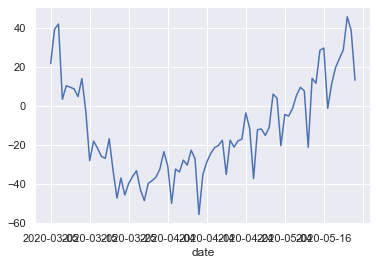

In [23]:
import seaborn
seaborn.set()
mob.loc['US_OH', 'mobility_driving'].plot()